In [17]:
import pandas as pd

# Load the dataset from Excel file
excel_path = 'C:/Users/saiki/Downloads/Final_Majestic_to_AIM_jan-2016tomarch-2018.xlsx'  # Update with the correct file path
data = pd.read_excel(excel_path)

# Display the first few rows of the dataset
print(data.head())


                  Date  Origin Movement ID  \
0  2017-04-04 00:00:00                 100   
1  2017-05-04 00:00:00                 100   
2  2017-06-04 00:00:00                 100   
3  2017-07-04 00:00:00                 100   
4  2017-08-04 00:00:00                 100   

                          Origin Display Name  Destination Movement ID  \
0  Kempegowda, Majestic, Bengaluru, Karnataka                      171   
1  Kempegowda, Majestic, Bengaluru, Karnataka                      171   
2  Kempegowda, Majestic, Bengaluru, Karnataka                      171   
3  Kempegowda, Majestic, Bengaluru, Karnataka                      171   
4  Kempegowda, Majestic, Bengaluru, Karnataka                      171   

                            Destination Display Name  \
0  Analytics India Magazine, #280, 2nd floor, 5th...   
1  Analytics India Magazine, #280, 2nd floor, 5th...   
2  Analytics India Magazine, #280, 2nd floor, 5th...   
3  Analytics India Magazine, #280, 2nd floor, 5th...  

In [18]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for missing values
missing_data = data.isnull().sum()

# Check for duplicates
duplicate_data = data.duplicated().sum()

missing_data, duplicate_data


(Date                                                       0
 Origin Movement ID                                         0
 Origin Display Name                                        0
 Destination Movement ID                                    0
 Destination Display Name                                   0
 Daily Mean Travel Time (Seconds)                           0
 Daily Range - Lower Bound Travel Time (Seconds)            0
 Daily Range - Upper Bound Travel Time (Seconds)            0
 AM Mean Travel Time (Seconds)                              1
 AM Range - Lower Bound Travel Time (Seconds)               1
 AM Range - Upper Bound Travel Time (Seconds)               1
 PM Mean Travel Time (Seconds)                              0
 PM Range - Lower Bound Travel Time (Seconds)               0
 PM Range - Upper Bound Travel Time (Seconds)               0
 Midday Mean Travel Time (Seconds)                          1
 Midday Range - Lower Bound Travel Time (Seconds)           1
 Midday 

In [19]:
# Fill missing values with the median of their respective columns
time_columns = [
    "AM Mean Travel Time (Seconds)", 
    "AM Range - Lower Bound Travel Time (Seconds)",
    "AM Range - Upper Bound Travel Time (Seconds)",
    "Midday Mean Travel Time (Seconds)",
    "Midday Range - Lower Bound Travel Time (Seconds)",
    "Midday Range - Upper Bound Travel Time (Seconds)"
]

for col in time_columns:
    data[col] = data[col].fillna(data[col].median())

# Verify filling by checking for missing values again
updated_missing_data = data.isnull().sum()
updated_missing_data


Date                                                       0
Origin Movement ID                                         0
Origin Display Name                                        0
Destination Movement ID                                    0
Destination Display Name                                   0
Daily Mean Travel Time (Seconds)                           0
Daily Range - Lower Bound Travel Time (Seconds)            0
Daily Range - Upper Bound Travel Time (Seconds)            0
AM Mean Travel Time (Seconds)                              0
AM Range - Lower Bound Travel Time (Seconds)               0
AM Range - Upper Bound Travel Time (Seconds)               0
PM Mean Travel Time (Seconds)                              0
PM Range - Lower Bound Travel Time (Seconds)               0
PM Range - Upper Bound Travel Time (Seconds)               0
Midday Mean Travel Time (Seconds)                          0
Midday Range - Lower Bound Travel Time (Seconds)           0
Midday Range - Upper Bou

C:\Users\saiki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\saiki\AppData\Local\Temp\ipykernel_21072\1356769698.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features["clusters"] = kmeans.labels_
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py

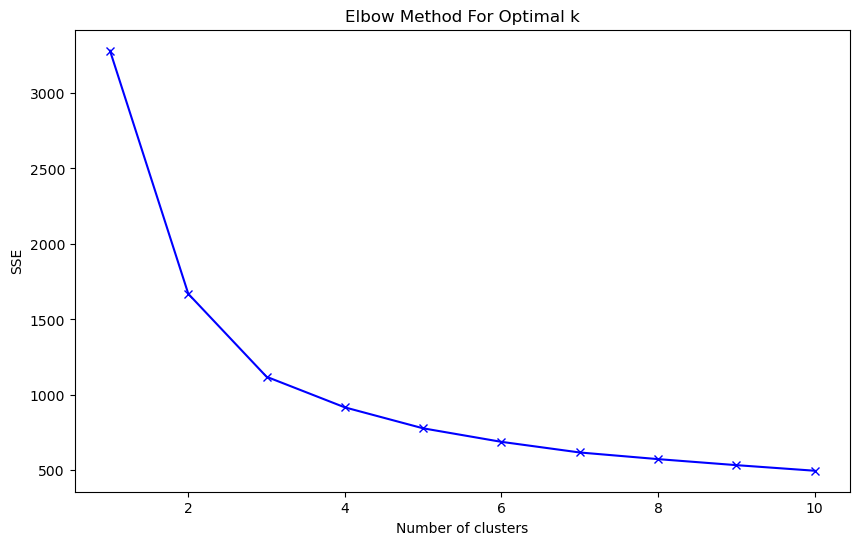

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Selecting features for clustering
clustering_features = data[[
    "Daily Mean Travel Time (Seconds)", 
    "AM Mean Travel Time (Seconds)", 
    "PM Mean Travel Time (Seconds)",
    "Evening Mean Travel Time (Seconds)"
]]

# Normalize the features
clustering_features_normalized = (clustering_features - clustering_features.mean()) / clustering_features.std()

# Elbow method to determine the optimal number of clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(clustering_features_normalized)
    clustering_features["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method For Optimal k")
plt.show()


C:\Users\saiki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


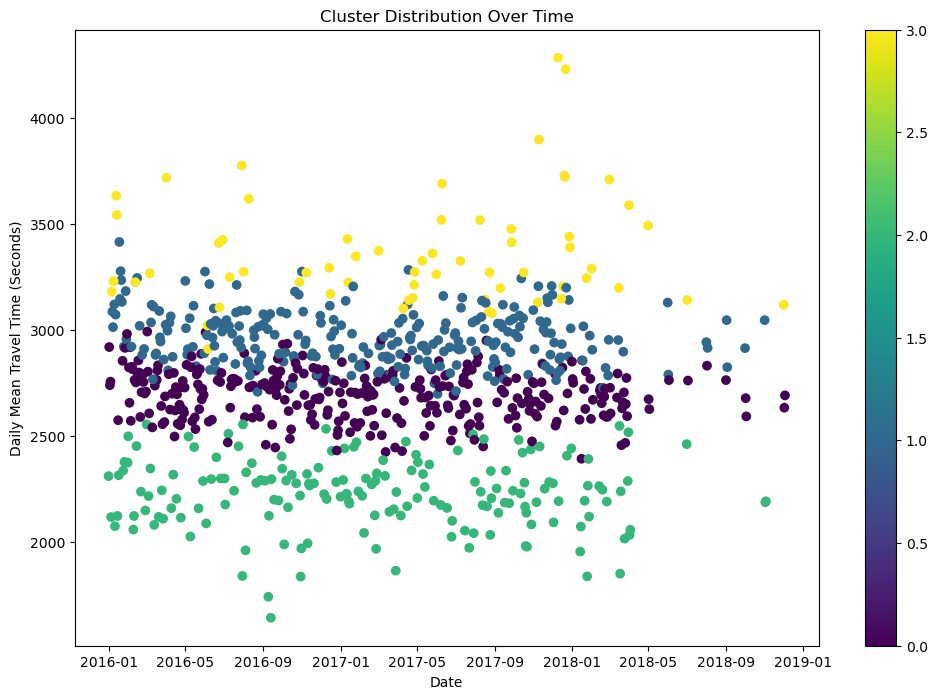

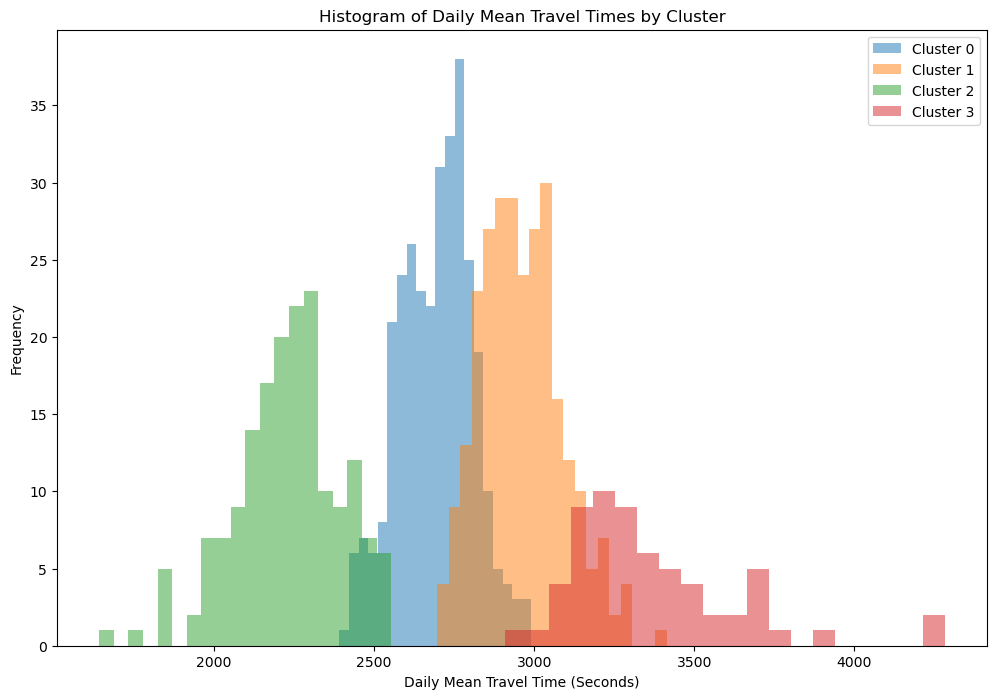

In [21]:
# Apply k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_features_normalized)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Visualize the clusters using scatter plots
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['Date'], data['Daily Mean Travel Time (Seconds)'], c=data['Cluster'], cmap='viridis')
plt.title('Cluster Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Mean Travel Time (Seconds)')
plt.colorbar(scatter)
plt.show()

# Generate histograms for each cluster
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.hist(data[data['Cluster'] == i]['Daily Mean Travel Time (Seconds)'], bins=20, alpha=0.5, label=f'Cluster {i}')
plt.title('Histogram of Daily Mean Travel Times by Cluster')
plt.xlabel('Daily Mean Travel Time (Seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


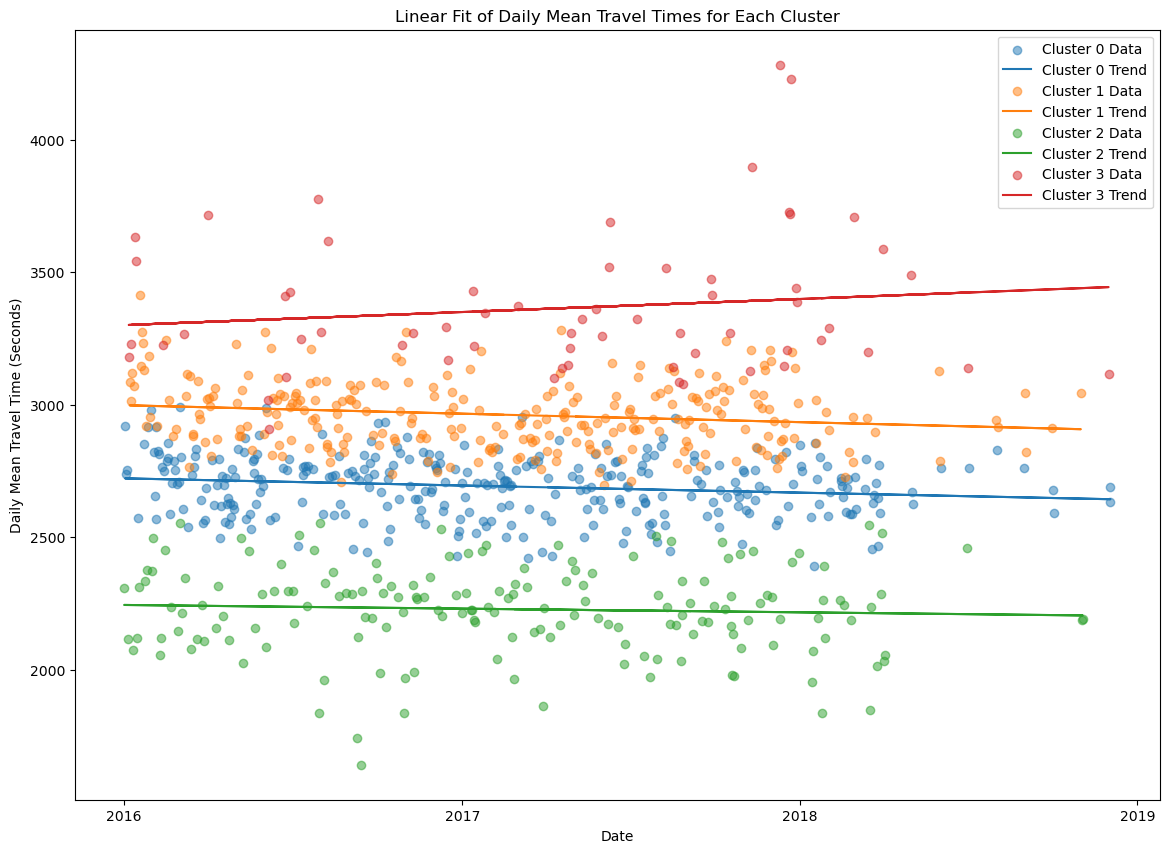

In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

# Prepare the data for linear regression
data['DateOrdinal'] = data['Date'].apply(lambda x: x.toordinal())  # Convert dates to ordinal for regression

# Setting up the figure for plotting
plt.figure(figsize=(14, 10))

# Fit and plot a linear regression for each cluster
for i in range(4):
    cluster_data = data[data['Cluster'] == i]
    X = cluster_data[['DateOrdinal']]  # Feature: Ordinal date
    y = cluster_data['Daily Mean Travel Time (Seconds)']  # Target: Daily Mean Travel Time

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot
    plt.scatter(cluster_data['Date'], y, alpha=0.5, label=f'Cluster {i} Data')
    plt.plot(cluster_data['Date'], y_pred, label=f'Cluster {i} Trend')

# Enhancing the plot
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Linear Fit of Daily Mean Travel Times for Each Cluster')
plt.xlabel('Date')
plt.ylabel('Daily Mean Travel Time (Seconds)')
plt.legend()
plt.show()


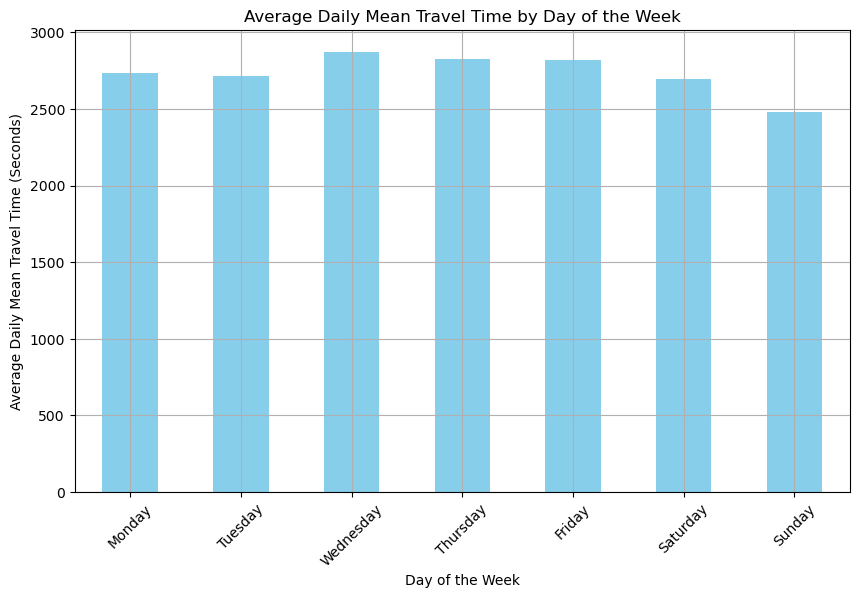

In [23]:
# Add a day of the week column to the dataset
data['DayOfWeek'] = data['Date'].dt.day_name()

# Calculate average travel times for each day of the week
average_travel_by_day = data.groupby('DayOfWeek')['Daily Mean Travel Time (Seconds)'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting the average travel times by day of the week
plt.figure(figsize=(10, 6))
average_travel_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Daily Mean Travel Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Mean Travel Time (Seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


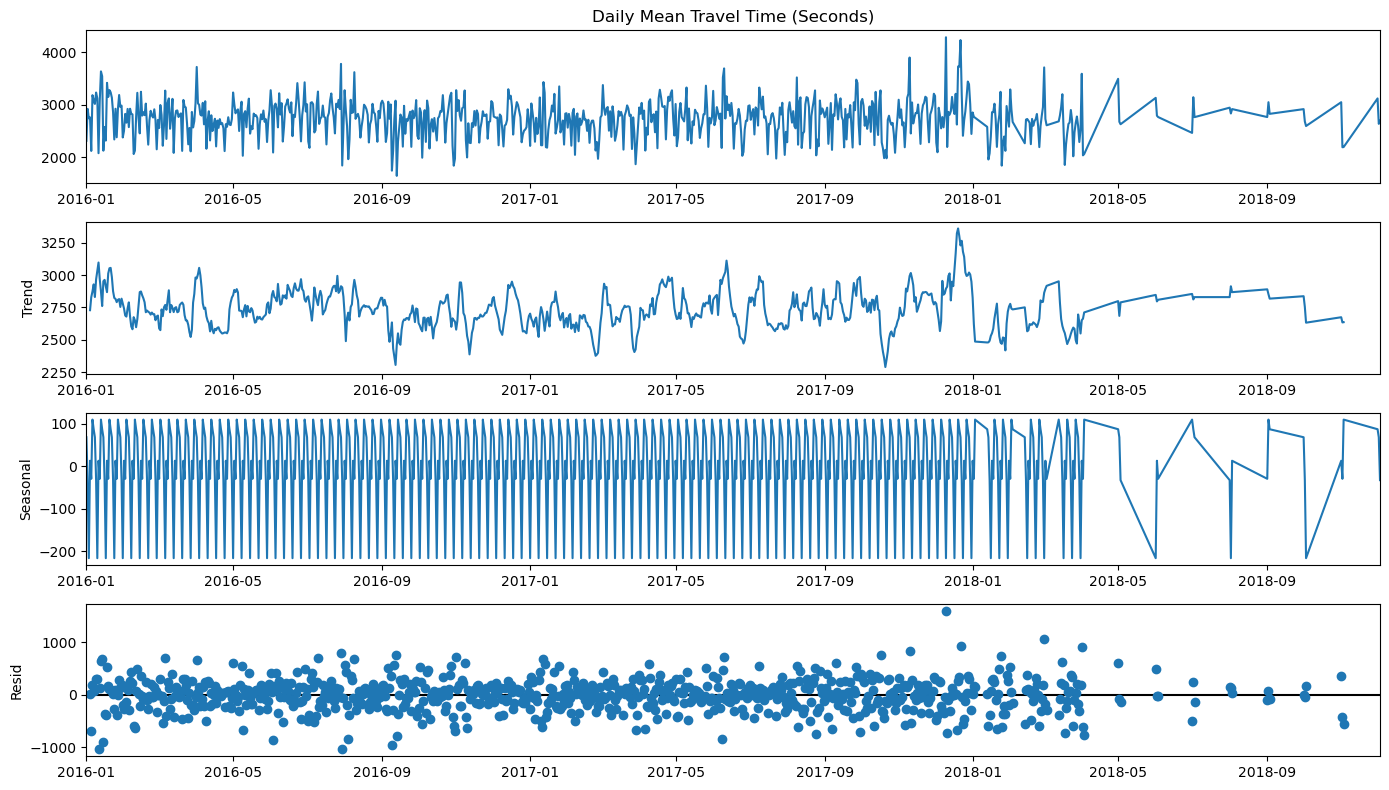

In [24]:
# Decomposing the time series with a specified period of 7 days
result = seasonal_decompose(data_resampled['Daily Mean Travel Time (Seconds)'].dropna(), model='additive', period=7)

# Plotting the decomposed components
fig = result.plot()
fig.set_size_inches(14, 8)
fig.tight_layout()
plt.show()


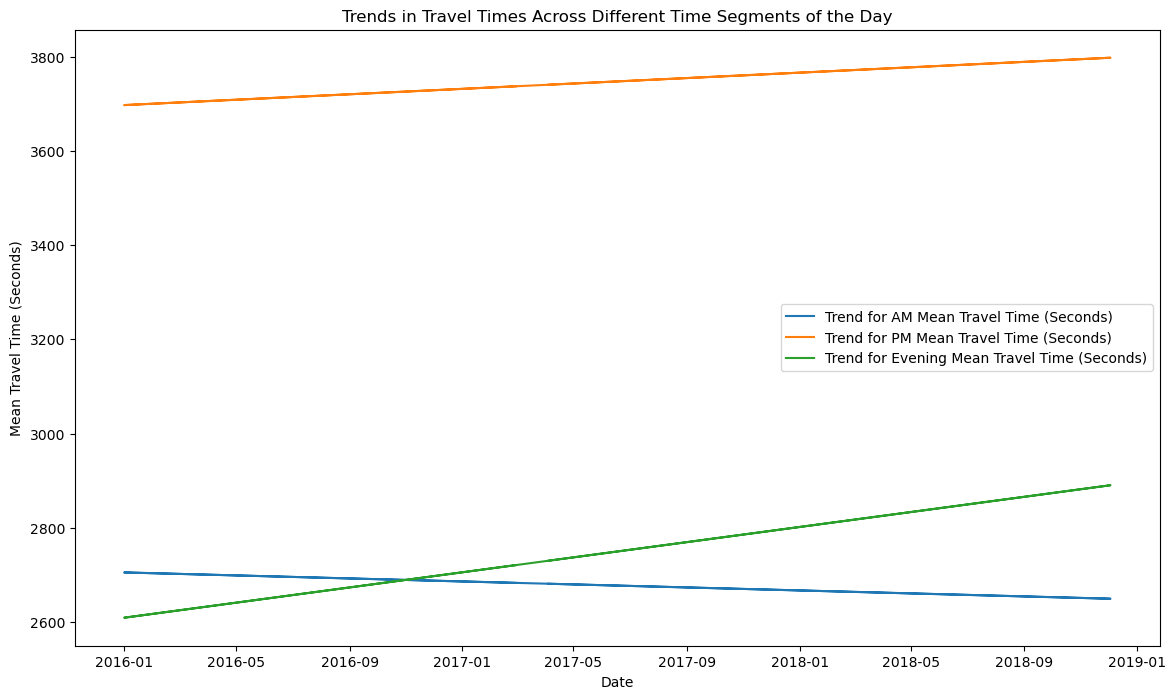

In [25]:
# Define the time segments for plotting trends
time_segments = ['AM Mean Travel Time (Seconds)', 'PM Mean Travel Time (Seconds)', 'Evening Mean Travel Time (Seconds)']

# Setting up the plot
plt.figure(figsize=(14, 8))

# Loop through each time segment to plot the trend
for segment in time_segments:
    # Prepare data for regression
    segment_data = data.dropna(subset=[segment])
    X = segment_data[['DateOrdinal']]
    y = segment_data[segment]

    # Linear regression to find the trend
    model = LinearRegression()
    model.fit(X, y)
    trend_line = model.predict(X)

    # Plotting
    plt.plot(segment_data['Date'], trend_line, label=f'Trend for {segment}')

plt.title('Trends in Travel Times Across Different Time Segments of the Day')
plt.xlabel('Date')
plt.ylabel('Mean Travel Time (Seconds)')
plt.legend()
plt.show()


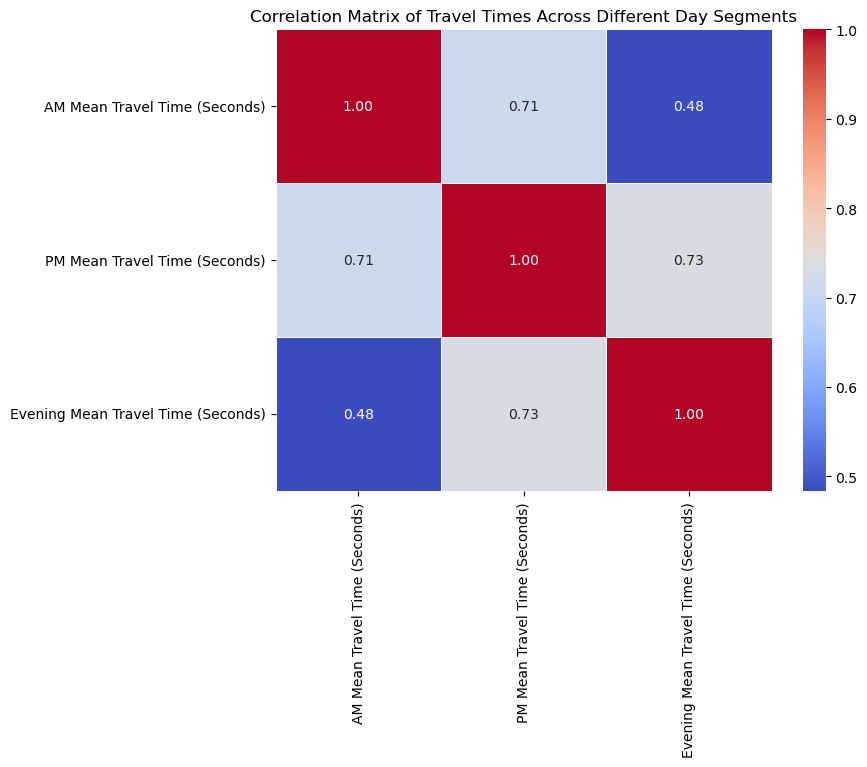

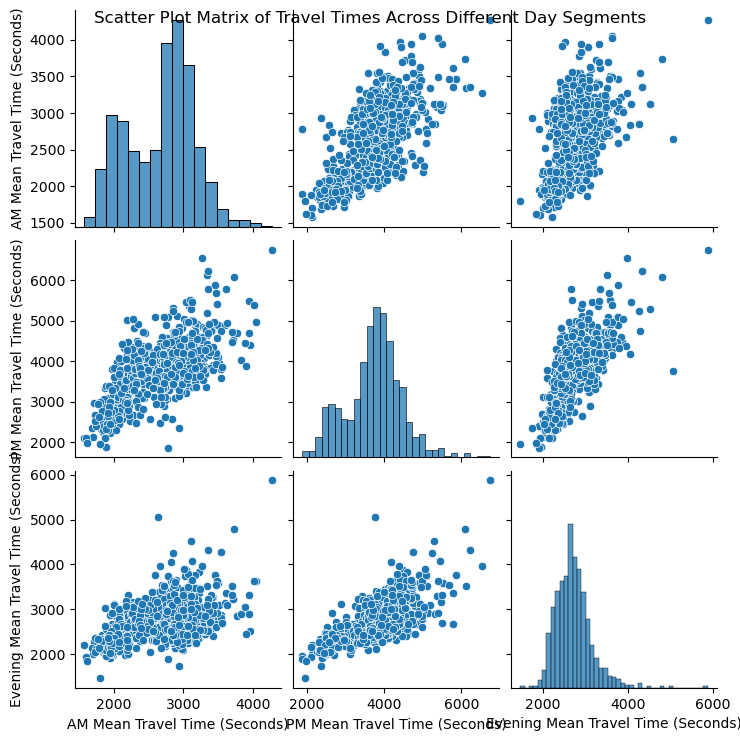

In [26]:
import seaborn as sns

# Selecting columns for multivariate analysis
multivariate_data = data[['AM Mean Travel Time (Seconds)', 'PM Mean Travel Time (Seconds)', 'Evening Mean Travel Time (Seconds)']]

# Compute the correlation matrix
correlation_matrix = multivariate_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Travel Times Across Different Day Segments')
plt.show()

# Scatter plot matrix to visualize relationships
sns.pairplot(multivariate_data)
plt.suptitle('Scatter Plot Matrix of Travel Times Across Different Day Segments', verticalalignment='top')
plt.show()


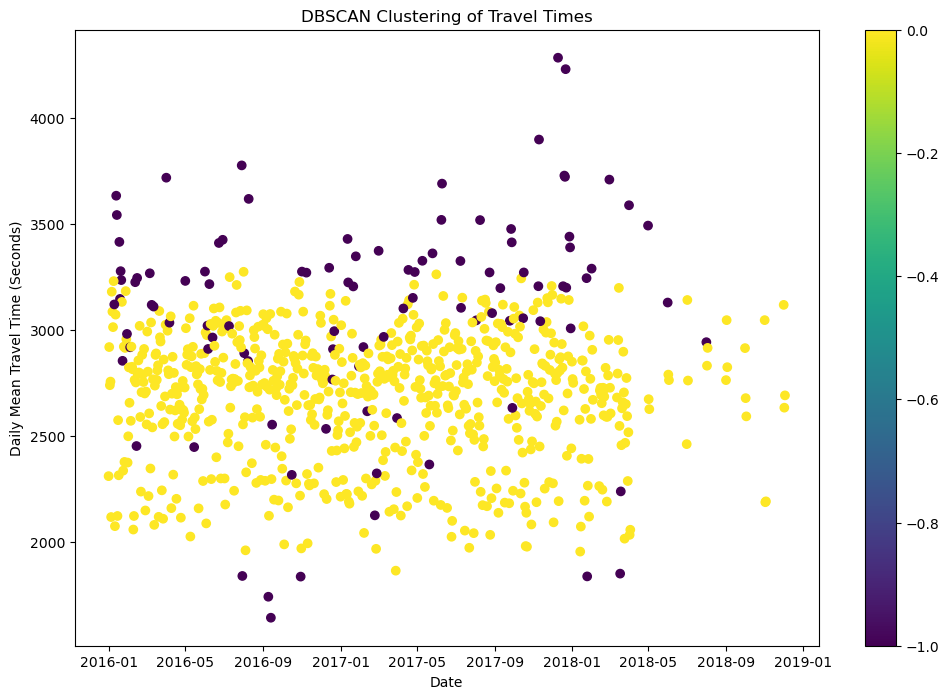

In [27]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN clustering
# We use the same normalized feature set used for k-means
dbscan = DBSCAN(eps=0.5, min_samples=5)  # epsilon and minimum samples chosen based on typical settings
dbscan_clusters = dbscan.fit_predict(clustering_features_normalized)

# Adding DBSCAN cluster labels to the dataset
data['DBSCAN_Cluster'] = dbscan_clusters

# Visualize the DBSCAN clustering results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['Date'], data['Daily Mean Travel Time (Seconds)'], c=data['DBSCAN_Cluster'], cmap='viridis', label=np.unique(dbscan_clusters))
plt.title('DBSCAN Clustering of Travel Times')
plt.xlabel('Date')
plt.ylabel('Daily Mean Travel Time (Seconds)')
plt.colorbar(scatter)
plt.show()
